In [60]:
%load_ext autoreload
%autoreload 2

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
renaming = {'35_21_1000_CCR_CAT_RON': '35_21_1000.Q.KatKlD.1444.octanI', '35_21_1000.Q.KatKlAB.DavNpar': '35_21_1000_CCR_CAT_RVP', 
            '35_21_1000.Q.KatKlAB.EBen70':'35_21_1000_CCR_CAT_70', '35_21_1000.Q.KatKlAB.AroPf.v':'35_21_1000_CCR_CAT_AR',
            '35_21_1000.Q.KatKlD.1444.octanI':'35_21_1000_CCR_CAT_RON', '35_21_1000_CCR_CAT_RVP':'35_21_1000.Q.KatKlAB.DavNpar',
            '35_21_1000_CCR_CAT_70':'35_21_1000.Q.KatKlAB.EBen70', '35_21_1000_CCR_CAT_AR':'35_21_1000.Q.KatKlAB.AroPf.v',
            }

In [3]:
soft = ['35_21_1000.Q.KatKlD.1444.octanI', '35_21_1000.Q.KatKlAB.DavNpar', '35_21_1000.Q.KatKlAB.EBen70', '35_21_1000.Q.KatKlAB.AroPf.v']

In [4]:
data = pd.read_csv("Dataset1.csv", sep=";")

In [5]:
data.shape

(2040480, 68)

In [6]:
data.head()

,Timestamp,35_21_1000.Q.KatKlAB.AroPf.v,35_21_1000.Q.KatKlAB.DavNpar,35_21_1000.Q.KatKlAB.EBen70,35_21_1000.Q.KatKlD.1444.octanI,35_21_1000_CCR_CAT_70,35_21_1000_CCR_CAT_AR,35_21_1000_CCR_CAT_RON,35_21_1000_CCR_CAT_RVP,35_21_1000_FC_3121.SP,...,35_21_1000_TI_3305,35_21_1000_TI_3581,CCR_CCR300_CV_3DT_H1_VAL,CCR_CCR300_CV_DT_R12_VAL,CCR_CCR300_CV_DT_R23_VAL,CCR_CCR300_CV_DT_R34_VAL,CCR_CCR300_CV_DT_R41_VAL,CCR_CCR300_CV_FI_3101PTC_VAL,CCR_CCR300_CV_PC_3180_OP_VAL,CCR_CCR300_CV_WAIT_SP_VAL
0,01.01.2016 00:00:00,65.59,48.0,6.0,98.9,6.87640,64.05901,98.45841,56.06648,0.00292,...,134.7649,25.61035,90.86990,-3.72980,-7.13281,-1.0,11.86261,59.14596,70.77777,519.1353
1,01.01.2016 00:01:00,65.59,48.0,6.0,98.9,6.86923,64.01093,98.45134,56.04396,0.00292,...,134.8389,25.61035,90.90942,-3.72989,-7.13306,-1.0,11.86295,59.18106,70.93322,519.1353
2,01.01.2016 00:02:00,65.59,48.0,6.0,98.9,6.86095,63.99218,98.44153,56.01728,0.00292,...,134.6192,25.61055,90.88013,-3.73050,-7.13440,-1.0,11.86490,59.16980,70.03181,519.1346
3,01.01.2016 00:03:00,65.59,48.0,6.0,98.9,6.85725,63.98800,98.44115,56.01207,0.00292,...,134.6191,25.63477,90.87057,-3.73145,-7.13660,-1.0,11.86804,59.30387,70.46443,519.1337
4,01.01.2016 00:04:00,65.59,48.0,6.0,98.9,6.85561,63.98110,98.43896,56.00104,0.00292,...,134.6191,25.63477,90.90518,-3.73212,-7.13818,-1.0,11.87030,59.26101,69.81942,519.1330


In [7]:
data.columns

Index(['Timestamp', '35_21_1000.Q.KatKlAB.AroPf.v',
       '35_21_1000.Q.KatKlAB.DavNpar', '35_21_1000.Q.KatKlAB.EBen70',
       '35_21_1000.Q.KatKlD.1444.octanI', '35_21_1000_CCR_CAT_70',
       '35_21_1000_CCR_CAT_AR', '35_21_1000_CCR_CAT_RON',
       '35_21_1000_CCR_CAT_RVP', '35_21_1000_FC_3121.SP', '35_21_1000_FC_3122',
       '35_21_1000_FC_321.SP', '35_21_1000_FI_3101', '35_21_1000_FI_3130',
       '35_21_1000_FI_326', '35_21_1000_FRQ_140', '35_21_1000_LC_208.OP',
       '35_21_1000_LC_3116.OP', '35_21_1000_PC_1214', '35_21_1000_PC_3123',
       '35_21_1000_PC_3123.OP', '35_21_1000_PC_3147', '35_21_1000_PC_3147.OP',
       '35_21_1000_PC_3158', '35_21_1000_PC_3158.OP', '35_21_1000_PC_3169',
       '35_21_1000_PC_3169.OP', '35_21_1000_PC_3180', '35_21_1000_PC_3194',
       '35_21_1000_PC_3194.OP', '35_21_1000_PI_3300', '35_21_1000_PI_3306',
       '35_21_1000_TC_301.OP', '35_21_1000_TC_301.SP', '35_21_1000_TC_304.OP',
       '35_21_1000_TC_304.SP', '35_21_1000_TC_307.OP', '35_21_

array([[<AxesSubplot:title={'center':'35_21_1000.Q.KatKlD.1444.octanI'}>,
        <AxesSubplot:title={'center':'35_21_1000.Q.KatKlAB.DavNpar'}>],
       [<AxesSubplot:title={'center':'35_21_1000.Q.KatKlAB.EBen70'}>,
        <AxesSubplot:title={'center':'35_21_1000.Q.KatKlAB.AroPf.v'}>]],
      dtype=object)

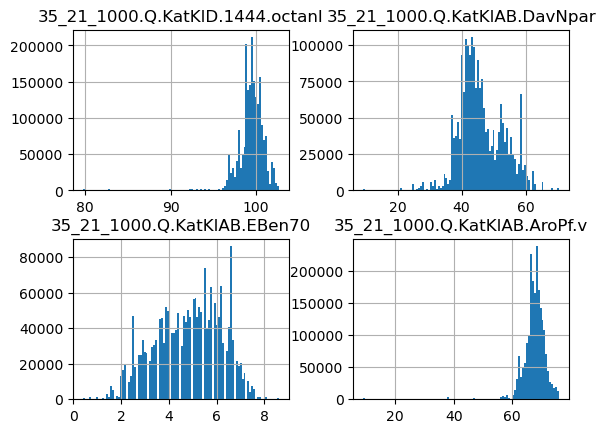

In [8]:
data[soft].hist(bins=100)

In [9]:
def check_periods(a):
    tmp = data[a].diff().dropna() != 0.0
    print(f'\n{a}\ncnt: {tmp.sum()}')
    inds = np.diff(np.where(tmp)[0])
    tmp = np.unique(inds, return_counts=True)
    print(f"min = {tmp[0][0]}")
    print(sorted([(y, x) for x, y in zip(*tmp)], reverse=True)[:5])

In [10]:
for name in soft:
    check_periods(name)


35_21_1000.Q.KatKlD.1444.octanI
cnt: 1217
min = 48
[(958, 1440), (130, 2880), (14, 4320), (7, 480), (6, 960)]

35_21_1000.Q.KatKlAB.DavNpar
cnt: 842
min = 120
[(493, 2880), (267, 1440), (12, 240), (11, 2640), (5, 1200)]

35_21_1000.Q.KatKlAB.EBen70
cnt: 1278
min = 120
[(1145, 1440), (78, 2880), (5, 960), (5, 480), (2, 1380)]

35_21_1000.Q.KatKlAB.AroPf.v
cnt: 867
min = 120
[(459, 2880), (325, 1440), (6, 4320), (3, 5760), (3, 960)]


Период 1440 минут (24 часа)

In [11]:
#Берем пока значения при изменениях
data1 = pd.read_csv("Dataset1.csv", sep=";")
for s in soft:
    mask = data1[s].diff() != 0.0
    new_val = data1[s].to_numpy().copy()
    new_val[~mask] = np.NaN
    data1[s] = new_val
#     data[s][~mask] = np.NaN

In [12]:
data1.drop([renaming[s] for s in soft], axis=1, inplace=True)

In [13]:
data1.shape

(2040480, 64)

In [14]:
data1.head()

,Timestamp,35_21_1000.Q.KatKlAB.AroPf.v,35_21_1000.Q.KatKlAB.DavNpar,35_21_1000.Q.KatKlAB.EBen70,35_21_1000.Q.KatKlD.1444.octanI,35_21_1000_FC_3121.SP,35_21_1000_FC_3122,35_21_1000_FC_321.SP,35_21_1000_FI_3101,35_21_1000_FI_3130,...,35_21_1000_TI_3305,35_21_1000_TI_3581,CCR_CCR300_CV_3DT_H1_VAL,CCR_CCR300_CV_DT_R12_VAL,CCR_CCR300_CV_DT_R23_VAL,CCR_CCR300_CV_DT_R34_VAL,CCR_CCR300_CV_DT_R41_VAL,CCR_CCR300_CV_FI_3101PTC_VAL,CCR_CCR300_CV_PC_3180_OP_VAL,CCR_CCR300_CV_WAIT_SP_VAL
0,01.01.2016 00:00:00,65.59,48.0,6.0,98.9,0.00292,33.61328,194.0002,59.90619,2798.065,...,134.7649,25.61035,90.86990,-3.72980,-7.13281,-1.0,11.86261,59.14596,70.77777,519.1353
1,01.01.2016 00:01:00,NaN,NaN,NaN,NaN,0.00292,33.77030,194.0002,60.26051,2826.544,...,134.8389,25.61035,90.90942,-3.72989,-7.13306,-1.0,11.86295,59.18106,70.93322,519.1353
2,01.01.2016 00:02:00,NaN,NaN,NaN,NaN,0.00292,33.86683,194.0002,60.16202,2817.218,...,134.6192,25.61055,90.88013,-3.73050,-7.13440,-1.0,11.86490,59.16980,70.03181,519.1346
3,01.01.2016 00:03:00,NaN,NaN,NaN,NaN,0.00292,34.00380,194.0002,60.28071,2806.594,...,134.6191,25.63477,90.87057,-3.73145,-7.13660,-1.0,11.86804,59.30387,70.46443,519.1337
4,01.01.2016 00:04:00,NaN,NaN,NaN,NaN,0.00292,33.70545,194.0002,59.33250,2774.242,...,134.6191,25.63477,90.90518,-3.73212,-7.13818,-1.0,11.87030,59.26101,69.81942,519.1330


In [38]:
data1.columns

Index(['Timestamp', '35_21_1000.Q.KatKlAB.AroPf.v',
       '35_21_1000.Q.KatKlAB.DavNpar', '35_21_1000.Q.KatKlAB.EBen70',
       '35_21_1000.Q.KatKlD.1444.octanI', '35_21_1000_FC_3121.SP',
       '35_21_1000_FC_3122', '35_21_1000_FC_321.SP', '35_21_1000_FI_3101',
       '35_21_1000_FI_3130', '35_21_1000_FI_326', '35_21_1000_FRQ_140',
       '35_21_1000_LC_208.OP', '35_21_1000_LC_3116.OP', '35_21_1000_PC_1214',
       '35_21_1000_PC_3123', '35_21_1000_PC_3123.OP', '35_21_1000_PC_3147',
       '35_21_1000_PC_3147.OP', '35_21_1000_PC_3158', '35_21_1000_PC_3158.OP',
       '35_21_1000_PC_3169', '35_21_1000_PC_3169.OP', '35_21_1000_PC_3180',
       '35_21_1000_PC_3194', '35_21_1000_PC_3194.OP', '35_21_1000_PI_3300',
       '35_21_1000_PI_3306', '35_21_1000_TC_301.OP', '35_21_1000_TC_301.SP',
       '35_21_1000_TC_304.OP', '35_21_1000_TC_304.SP', '35_21_1000_TC_307.OP',
       '35_21_1000_TC_307.SP', '35_21_1000_TC_310.OP', '35_21_1000_TC_310.SP',
       '35_21_1000_TC_3119.OP', '35_21_1000_

In [42]:
to_delete = data1.columns[1:][data1.iloc[:, 1:].std() < 0.01]
to_delete

Index(['35_21_1000_FC_3121.SP', '35_21_1000_FRQ_140'], dtype='object')

In [43]:
data1.drop(to_delete, axis=1, inplace=True)

In [44]:
data1.shape

(2040480, 62)

In [45]:
data1.to_csv("Dataset1_nans.csv", sep=';', index=False)

In [46]:
data1.shape

(2040480, 62)

Там есть две колонки: данные из лаборатории и соответствующие им названия, но они как будто уже интерполированы (линейными моделями)

In [16]:
a = '35_21_1000.Q.KatKlD.1444.octanI'
b = '35_21_1000_CCR_CAT_RON'

In [17]:
mask_a = data[a].diff().dropna() != 0

In [18]:
mask_a.sum()

1217

In [19]:
mask_b = data[b].diff().dropna() != 0

In [20]:
mask_b.sum()

1840853

In [21]:
(mask_a != mask_b).sum()

1839784

<AxesSubplot:>

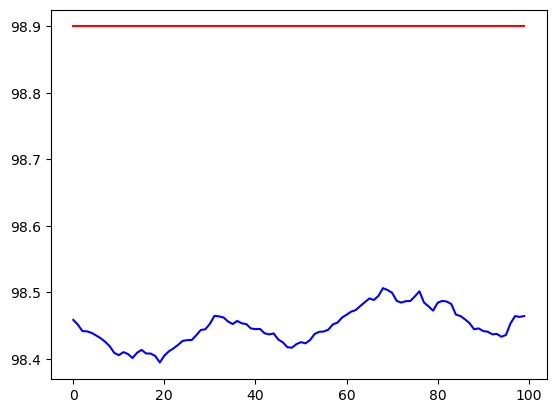

In [27]:
data[b][:100].plot(color='blue')
data[a][:100].plot(color='red')

<AxesSubplot:>

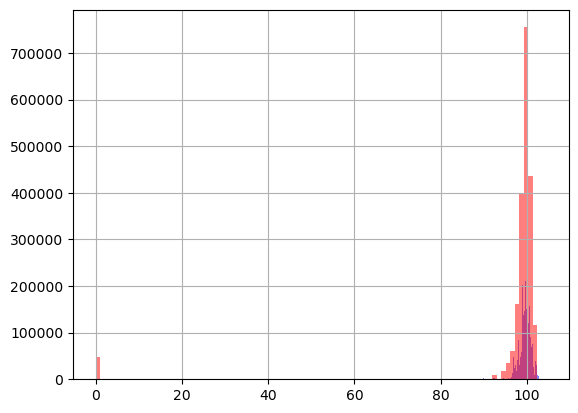

In [28]:
data[a].hist(bins=100, alpha=0.5, color='blue')
data[b].hist(bins=100, alpha=0.5, color='red')

In [29]:
renaming = {'35_21_1000.Q.KatKlD.1444.octanI':'35_21_1000_CCR_CAT_RON', '35_21_1000.Q.KatKlAB.DavNpar': '35_21_1000_CCR_CAT_RVP', 
            '35_21_1000.Q.KatKlAB.EBen70':'35_21_1000_CCR_CAT_70', '35_21_1000.Q.KatKlAB.AroPf.v':'35_21_1000_CCR_CAT_AR'
           }

In [30]:
for a, b in renaming.items():
    print(a, b)
    mask_a = data[a].diff().dropna() != 0
    mask_b = data[b].diff().dropna() != 0
    print(mask_a.sum(), mask_b.sum(), len(np.unique(data[a])), len(np.unique(data[b])))
    print((data[a] == data[b]).sum())
    print()
    

35_21_1000.Q.KatKlD.1444.octanI 35_21_1000_CCR_CAT_RON
1217 1840853 91 292667
100

35_21_1000.Q.KatKlAB.DavNpar 35_21_1000_CCR_CAT_RVP
842 1852034 619 1165281
0

35_21_1000.Q.KatKlAB.EBen70 35_21_1000_CCR_CAT_70
1278 1850969 71 542328
17

35_21_1000.Q.KatKlAB.AroPf.v 35_21_1000_CCR_CAT_AR
867 1662894 584 824135
4



In [31]:
a = '35_21_1000.Q.KatKlD.1444.octanI'
b = '35_21_1000_CCR_CAT_RON'

<AxesSubplot:>

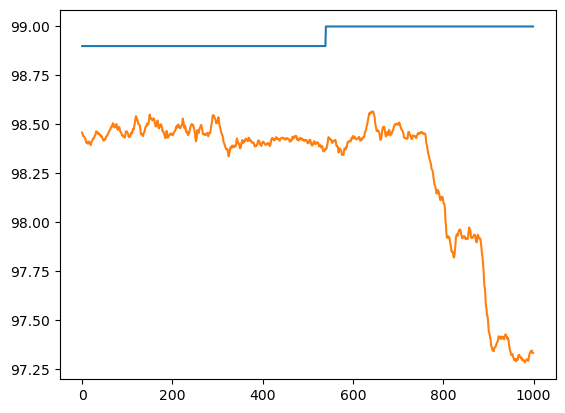

In [32]:
data[a][:1000].plot()
data[b][:1000].plot()

In [33]:
dataset = data.drop(['Timestamp'], axis=1).to_numpy()

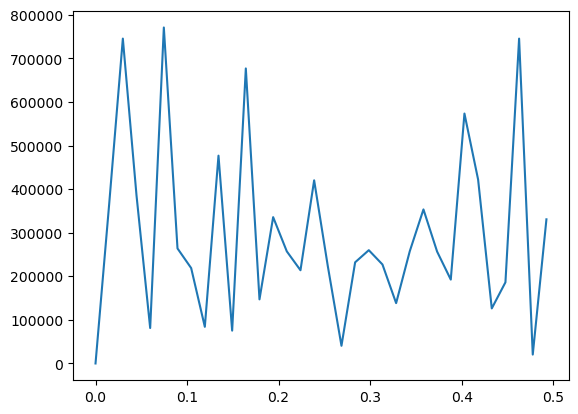

In [34]:
ind = 17
fr, pxx = signal.periodogram(dataset[ind])
plt.plot(fr, pxx)

In [35]:
fr, pxx = signal.periodogram(dataset[ind])
tmp = np.array(sorted([(x, y) for x, y in zip(fr, pxx)], key=lambda x: x[1], reverse=False))
np.diff(tmp[:, 1])

array([2.04394167e+04, 2.01840706e+04, 3.47572515e+04, 5.96903401e+03,
       2.81379229e+03, 4.21811195e+04, 1.21570208e+04, 8.60106952e+03,
       3.91468254e+04, 6.22905889e+03, 2.14484232e+04, 4.98466341e+03,
       4.46080797e+03, 3.82318702e+03, 4.94440000e+03, 2.45901519e+04,
       5.00460189e+02, 4.72631907e+02, 2.27844681e+03, 4.00142034e+03,
       6.68035395e+04, 5.01545792e+03, 1.76963693e+04, 1.24829116e+04,
       1.96835036e+04, 3.45960006e+04, 1.76240608e+03, 5.48656791e+04,
       9.65917538e+04, 1.03533982e+05, 6.84689887e+04, 3.31852094e+01,
       2.54971712e+04])

Периоды стабильности

In [102]:
data = pd.read_csv("Dataset1_nans.csv", sep=';')

In [121]:
table = pd.read_csv("../time_series/results/W20_group60/14_Agglomer_N11_w5.csv")

In [122]:
table.head()

,real 0,real 1,real 2,real 3,real 4,real 5,real 6,real 7,real 8,real 9,...,predicted 57,predicted 58,predicted 59,predicted 60,predicted 61,predicted 62,predicted 63,predicted 64,cluster_num,mode
0,65.35,59.01,6.3,99.0,6.877206,60.638621,96.988700,56.111976,30.173371,185.4998,...,90.118004,-2.600278,-4.822083,-1.998712,9.508716,51.974554,63.665997,514.590778,0.0,0.0
1,65.35,59.01,6.3,99.0,6.671172,59.757208,96.589930,55.460214,30.256506,185.4998,...,87.041553,-2.773569,-9.354023,-2.054787,14.006412,51.185280,64.797444,512.703378,0.0,0.0
2,65.35,59.01,6.3,99.0,6.697737,59.600586,96.513312,55.576851,30.009617,185.4998,...,83.411774,-1.274657,-14.818189,-2.100409,17.916185,49.969878,65.980312,510.783843,0.0,0.0
3,65.35,59.01,6.3,99.0,6.625373,59.381956,96.467145,55.349525,29.214250,185.4998,...,83.859106,-2.193774,-12.863567,-2.225634,17.254079,49.321644,65.780342,510.554381,0.0,0.0
4,65.35,59.01,6.3,99.0,6.667358,59.058685,96.425264,55.494705,28.949559,185.4998,...,83.792713,-2.477591,-12.492802,-2.017654,16.967051,49.317982,64.140450,510.576461,0.0,0.0


In [103]:
data.head()

,Timestamp,35_21_1000.Q.KatKlAB.AroPf.v,35_21_1000.Q.KatKlAB.DavNpar,35_21_1000.Q.KatKlAB.EBen70,35_21_1000.Q.KatKlD.1444.octanI,35_21_1000_FC_3122,35_21_1000_FC_321.SP,35_21_1000_FI_3101,35_21_1000_FI_3130,35_21_1000_FI_326,...,35_21_1000_TI_3305,35_21_1000_TI_3581,CCR_CCR300_CV_3DT_H1_VAL,CCR_CCR300_CV_DT_R12_VAL,CCR_CCR300_CV_DT_R23_VAL,CCR_CCR300_CV_DT_R34_VAL,CCR_CCR300_CV_DT_R41_VAL,CCR_CCR300_CV_FI_3101PTC_VAL,CCR_CCR300_CV_PC_3180_OP_VAL,CCR_CCR300_CV_WAIT_SP_VAL
0,01.01.2016 00:00:00,65.59,48.0,6.0,98.9,33.61328,194.0002,59.90619,2798.065,50.50889,...,134.7649,25.61035,90.86990,-3.72980,-7.13281,-1.0,11.86261,59.14596,70.77777,519.1353
1,01.01.2016 00:01:00,NaN,NaN,NaN,NaN,33.77030,194.0002,60.26051,2826.544,50.86543,...,134.8389,25.61035,90.90942,-3.72989,-7.13306,-1.0,11.86295,59.18106,70.93322,519.1353
2,01.01.2016 00:02:00,NaN,NaN,NaN,NaN,33.86683,194.0002,60.16202,2817.218,50.76682,...,134.6192,25.61055,90.88013,-3.73050,-7.13440,-1.0,11.86490,59.16980,70.03181,519.1346
3,01.01.2016 00:03:00,NaN,NaN,NaN,NaN,34.00380,194.0002,60.28071,2806.594,50.84354,...,134.6191,25.63477,90.87057,-3.73145,-7.13660,-1.0,11.86804,59.30387,70.46443,519.1337
4,01.01.2016 00:04:00,NaN,NaN,NaN,NaN,33.70545,194.0002,59.33250,2774.242,50.95883,...,134.6191,25.63477,90.90518,-3.73212,-7.13818,-1.0,11.87030,59.26101,69.81942,519.1330


In [65]:
import dataset_utils

In [117]:
SOFT_SENSOR_INDEX = 0
SOFT_SENSOR_NAME = soft[SOFT_SENSOR_INDEX]
K = 60

In [107]:
soft_data = data[soft].copy()
data_orig = data.drop(soft + ['Timestamp'], axis=1)
SOFT_SENSOR_NAME

'35_21_1000.Q.KatKlD.1444.octanI'

In [149]:
data2 = data.groupby(data.index // K).mean() #усреднение


In [150]:
data2.shape

(34008, 61)

In [152]:
data2.head()

,35_21_1000.Q.KatKlAB.AroPf.v,35_21_1000.Q.KatKlAB.DavNpar,35_21_1000.Q.KatKlAB.EBen70,35_21_1000.Q.KatKlD.1444.octanI,35_21_1000_FC_3122,35_21_1000_FC_321.SP,35_21_1000_FI_3101,35_21_1000_FI_3130,35_21_1000_FI_326,35_21_1000_LC_208.OP,...,35_21_1000_TI_3305,35_21_1000_TI_3581,CCR_CCR300_CV_3DT_H1_VAL,CCR_CCR300_CV_DT_R12_VAL,CCR_CCR300_CV_DT_R23_VAL,CCR_CCR300_CV_DT_R34_VAL,CCR_CCR300_CV_DT_R41_VAL,CCR_CCR300_CV_FI_3101PTC_VAL,CCR_CCR300_CV_PC_3180_OP_VAL,CCR_CCR300_CV_WAIT_SP_VAL
0,65.59,48.0,6.0,98.9,34.034735,194.0002,59.894503,2801.482350,50.822693,32.107148,...,134.198328,25.599473,91.150684,-3.672581,-7.003985,-1.000000,11.676564,59.184669,72.472334,519.192313
1,NaN,NaN,NaN,NaN,33.966842,194.0002,59.930134,2780.469317,51.254906,33.110013,...,134.250020,25.573289,91.250144,-3.693115,-7.050536,-1.000000,11.743650,59.208038,74.040088,519.171748
2,NaN,NaN,NaN,NaN,34.260235,194.0002,59.973913,2765.337083,53.585262,33.295271,...,134.419703,25.502970,90.521686,-3.592844,-8.068762,-1.000000,12.661605,59.261616,75.300177,518.814445
3,NaN,NaN,NaN,NaN,34.652325,194.0002,59.851254,2753.286183,52.626163,32.260792,...,134.126573,25.471651,89.777658,-3.959862,-8.755280,-1.000000,13.715141,59.155983,78.374397,518.500412
4,NaN,NaN,NaN,NaN,34.688020,194.0002,59.917839,2819.362900,52.683457,32.706224,...,134.075755,25.514469,89.694157,-4.097194,-8.565953,-1.000908,13.664054,59.140597,79.965731,518.326127


In [124]:
table.shape

(33967, 132)

In [125]:
table.shape[0] - data2.shape[0]

-41

In [198]:
mae = []
for sh in range(data2.shape[0] - table.shape[0] + 1):
    fin = sh + table.shape[0]
    mae.append(np.mean(np.abs(data2.iloc[sh:fin, 6] - table['real 10'].values)))
mae = np.array(mae)
tmp = np.argsort(mae)[:5] 
tmp, mae[tmp]

(array([21, 22, 20, 23, 19]),
 array([0.66489635, 0.90815742, 0.94841782, 1.06611125, 1.14627819]))

In [234]:
n = table.shape[0]
a = data2.iloc[21:, 6].values
b = table['real 10'].values

In [211]:
dif = np.abs(data2.iloc[21:21+table.shape[0], 6] - table['real 10'].values)

In [212]:
(dif).max()

54.01949383333333

In [213]:
np.where(dif > 54)

(array([30802]),)

In [250]:
table['cluster_num'].values[30800:30804]

array([2., 2., 2., 2.])

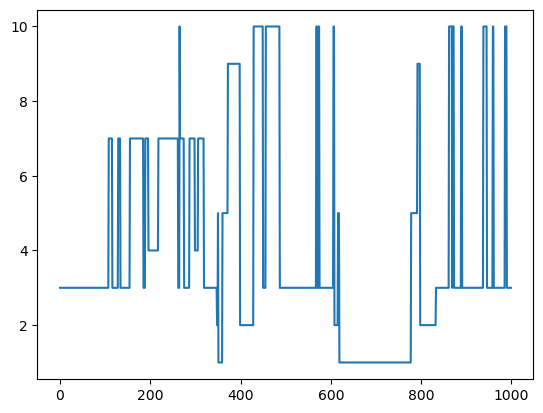

In [227]:
plt.plot(table['cluster_num'].values[30000:31000])

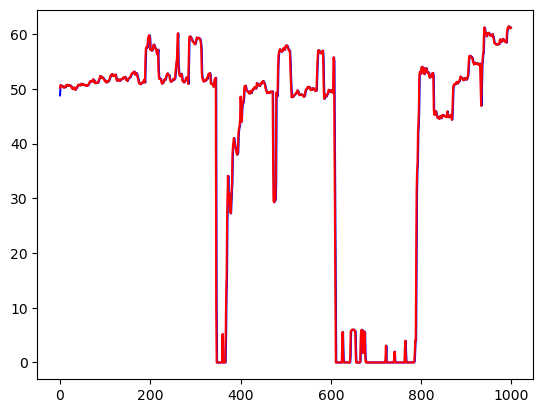

In [224]:
plt.plot(data2.iloc[30040:31040, 6].values, color='blue')
plt.plot(table['real 10'].values[30000:31000], color='red')

In [417]:
clusters = table['cluster_num'].values.astype(np.int32)
clusters = np.pad(clusters, (21, 0), mode='constant', constant_values=(clusters[0]))
clusters = np.pad(clusters, (0, 20), mode='constant', constant_values=(clusters[-1]))
clusters.shape[0] - n, (clusters[21:-20] == table['cluster_num'].values).all()

(41, True)

In [418]:
mask = (clusters == 3) | (clusters == 7) | (clusters == 10)

In [419]:
mask.sum()

26029

In [368]:
with open("periods_W20_gr60_Agl.npy", "wb") as f:
    np.save(f, mask, allow_pickle=True)

In [367]:
with open("periods_W20_gr60_Agl.npy", "rb") as f:
    m = np.load(f)

In [423]:
mask.sum() / mask.shape[0]

0.7653787344154317

In [428]:
(mask[::2] & mask[1::2]).sum() / (mask.shape[0] // 2)

0.7582921665490473

In [429]:
mask = (mask[::2] & mask[1::2])

In [430]:
with open("periods_W20_gr240_Agl.npy", "wb") as f:
    np.save(f, mask, allow_pickle=True)

In [409]:
sizes_in_periods = []
#modify Dataset to return periods
for i in range(4):
    dataset = dataset_utils.Dataset(data_orig, soft_data[soft[i]], K=60, diff=False, periods="periods_W20_gr60_Agl.npy")
    dataset_x, dataset_y, _, periods = dataset.window_view(W=1)
    sizes_in_periods.append(periods.sum() / dataset.soft_data.shape[0])
    print("->", periods.sum(), "/", dataset.soft_data.shape[0])
print(sizes_in_periods)

periods.shape=(34008,), periods.sum()=975
(975, 1, 57) (975,)
-> 975 / 1218
periods.shape=(34008,), periods.sum()=658
(658, 1, 57) (658,)
-> 658 / 843
periods.shape=(34008,), periods.sum()=1035
(1035, 1, 57) (1035,)
-> 1035 / 1279
periods.shape=(34008,), periods.sum()=674
(674, 1, 57) (674,)
-> 674 / 868
[0.8004926108374384, 0.7805456702253856, 0.8092259577795152, 0.7764976958525346]


In [416]:
#Modify to ordinary
dataset = dataset_utils.Dataset(data_orig, soft_data[soft[2]], K=60, diff=False, periods="periods_W20_gr60_Agl.npy")
dataset_x, dataset_y, _ = dataset.window_view(W=10)
    

periods.shape=(33999,), periods.sum()=1035
(1035, 10, 57) (1035,)


In [397]:
np.where(dataset_y < -10)

(array([], dtype=int64),)

In [398]:
clusters[200:260]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8], dtype=int32)

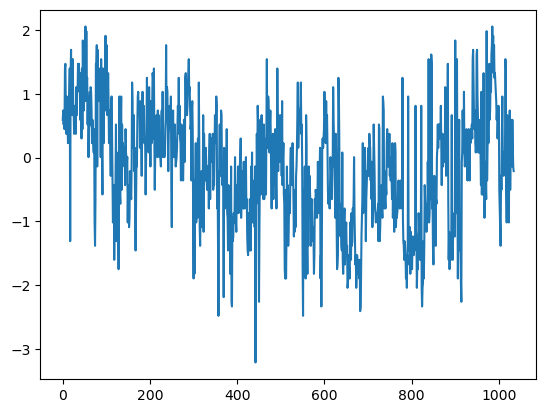

In [399]:
plt.plot(dataset_y)